# Setup and Load Data

1.1 Install Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.backend import clear_session
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset

/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset


In [3]:
directories = os.listdir()

filename = []
label = []
for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset/a-segar
a-segar/20221024_071252.jpg
a-segar/20221024_071335.jpg
a-segar/20221024_071411.jpg
a-segar/20221024_071445.jpg
a-segar/20221024_071514.jpg
a-segar/20221024_071546.jpg
a-segar/20221024_071610.jpg
a-segar/20221024_091728.jpg
a-segar/20221024_091800.jpg
a-segar/20221024_092018.jpg
a-segar/20221024_092036.jpg
a-segar/20221024_092106.jpg
a-segar/20221028_193042.jpg
a-segar/20221028_193103.jpg
a-segar/20221028_193124.jpg
a-segar/20221028_193147.jpg
a-segar/20221028_193211(0).jpg
a-segar/20221028_193242.jpg
a-segar/20221028_193308.jpg
a-segar/20221028_193333.jpg
a-segar/20221028_193353.jpg
a-segar/20221028_193416.jpg
a-segar/20221028_193431.jpg
a-segar/20221028_193447.jpg
a-segar/20221028_193510.jpg
a-segar/20221028_193524.jpg
a-segar/20221028_193538.jpg
a-segar/20221028_193551.jpg
a-segar/20221028_193618.jpg
a-segar/20221028_193640.jpg
a-segar/20221028_193703(0).jpg
a-segar/20221028_193719.jpg
a-segar/20221028_193753.jpg
a-se

In [4]:
print(len(filename))

540


Save List of Images to Pandas

In [5]:
import pandas as pd

data = {"filename": filename,
        "label": label
        }

df = pd.DataFrame(data = data)

Print List of Images files

In [6]:
print(df)

                                filename         label
0            a-segar/20221024_071252.jpg       a-segar
1            a-segar/20221024_071335.jpg       a-segar
2            a-segar/20221024_071411.jpg       a-segar
3            a-segar/20221024_071445.jpg       a-segar
4            a-segar/20221024_071514.jpg       a-segar
..                                   ...           ...
535     c-tidaklayak/20221031_175526.jpg  c-tidaklayak
536  c-tidaklayak/20221031_175536(0).jpg  c-tidaklayak
537     c-tidaklayak/20221031_175548.jpg  c-tidaklayak
538     c-tidaklayak/20221031_175600.jpg  c-tidaklayak
539     c-tidaklayak/20221031_175611.jpg  c-tidaklayak

[540 rows x 2 columns]


Randomize the List of Image Files

In [7]:
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

                             filename         label
341     b-baik/20221031_131846(0).jpg        b-baik
485  c-tidaklayak/20221031_160826.jpg  c-tidaklayak
192        b-baik/20221029_003909.jpg        b-baik
298        b-baik/20221031_112513.jpg        b-baik
494  c-tidaklayak/20221031_161339.jpg  c-tidaklayak
..                                ...           ...
60        a-segar/20221028_215444.jpg       a-segar
311        b-baik/20221031_113017.jpg        b-baik
182        b-baik/20221024_112227.jpg        b-baik
426  c-tidaklayak/20221029_092612.jpg  c-tidaklayak
486  c-tidaklayak/20221031_160848.jpg  c-tidaklayak

[540 rows x 2 columns]


Cross Validation

In [8]:
from sklearn.model_selection import KFold

train_data = df_shuffled

Y = train_data[['label']]

# number of split is 4
kf = KFold(n_splits = 4)

Preprocessing the Training Set

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)

Preprocessing the Test Set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

## Building the CNN Model

Define the directories of dataset

In [11]:
image_dir = '/content/drive/MyDrive/Colab Notebooks/TugasAkhir/dataset'

Method for save the best CNN model

In [12]:
def get_model_name(k):
  return 'model_' + str(k) + '.h5'

Import and define the performance metric

In [13]:
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

# Build and Train the CNN Model

In [15]:
save_dir = '/saved_models/'
fold_var = 1

# Looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(Y)), Y):
  training_data = train_data.iloc[train_index]
  validation_data = train_data.iloc[val_index]

  train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir,
                                                           x_col = "filename", y_col = "label",
                                                           target_size = (256, 256), batch_size = 32,
                                                           class_mode = "categorical", shuffle = False)
  
  valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir,
                                                           x_col = "filename", y_col = "label",
                                                           target_size = (256, 256), batch_size = 32,
                                                           class_mode = "categorical", shuffle = False)
  
  model = Sequential()
  model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Conv2D(16, (3,3), 1, activation='relu'))
  model.add(MaxPooling2D())

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.summary

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var),
                               monitor = 'val_accuracy', verbose = 1,
                               save_best_only = True, mode = 'max')
  
  callback_list = [checkpoint]

  hist = model.fit(train_data_generator, 
                   epochs = 20, 
                   callbacks = callback_list, 
                   validation_data = valid_data_generator)
  
  model.load_weights("/saved_models/model_" + str(fold_var) + ".h5")

  results = model.evaluate(valid_data_generator)
  results = dict(zip(model.metrics_names, results))

  y_predict = model.predict(valid_data_generator)

  # get the label of validation data
  y = np.asarray(valid_data_generator.labels)

  # Karena output multilable adalah 0 - 1 dari tiap class maka diambil yg terbesar
  y_predict_labels = np.argmax(y_predict, axis=1)

  acc = accuracy_score(y_predict_labels, y)
  prec = precision_score(y_predict_labels, y, average = 'weighted')
  rec = recall_score(y_predict_labels, y, average = 'weighted')
  f1score = f1_score(y_predict_labels, y, average = 'weighted')

  print("\n")
  print("Cross Validation: ", fold_var)
  print("accuracy: ", results['accuracy'])
  print("precision: ", prec)
  print("recall: ", rec)
  print("f1 score: ", f1score)
  print("\n")

  VALIDATION_ACCURACY.append(results['accuracy'])
  VALIDATION_PRECISION.append(prec)
  VALIDATION_RECALL.append(rec)
  VALIDATION_F1SCORE.append(f1score)

  LOSS.append(hist.history['loss'])
  ACCURACY.append(hist.history['accuracy'])

  VAL_LOSS.append(hist.history['val_loss'])
  VAL_ACCURACY.append(hist.history['val_accuracy'])

  CV.append("CV" + str(fold_var))

  clear_session()

  fold_var += 1

Found 405 validated image filenames belonging to 3 classes.
Found 135 validated image filenames belonging to 3 classes.
Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.1903 - accuracy: 0.3753
Epoch 1: val_accuracy improved from -inf to 0.41481, saving model to /saved_models/model_1.h5
13/13 [==============================] - 178s 15s/step - loss: 1.1903 - accuracy: 0.3753 - val_loss: 1.0249 - val_accuracy: 0.4148
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 0.9549 - accuracy: 0.5284
Epoch 2: val_accuracy improved from 0.41481 to 0.55556, saving model to /saved_models/model_1.h5
13/13 [==============================] - 29s 2s/step - loss: 0.9549 - accuracy: 0.5284 - val_loss: 0.8538 - val_accuracy: 0.5556
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.7570 - accuracy: 0.6370
Epoch 3: val_accuracy improved from 0.55556 to 0.57037, saving model to /saved_models/model_1.h5
13/13 [==============================] - 31s 3s/st

In [ ]:
  model.summary()

# View the Performance Graphs

Acuracy, Precision, Recall, F1 Score **Ke 5 Fold**

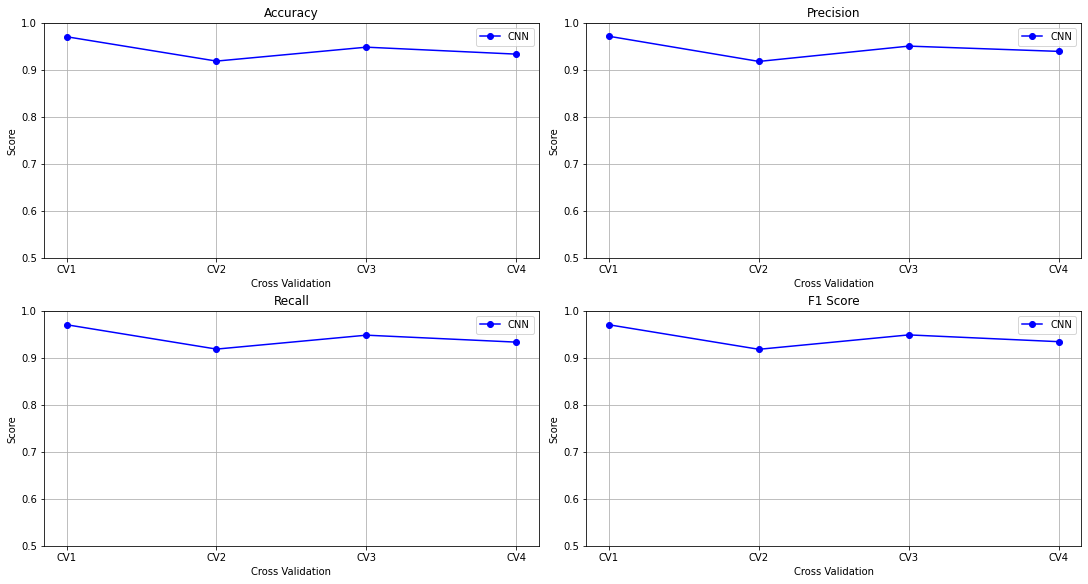

In [16]:
fig, axs = plt.subplots(2,2,constrained_layout=True,figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label="CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.5, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label="CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.5, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label="CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.5, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label="CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.5, 1))
axs[1,1].grid()
axs[1,1].legend()

Accuracy dan Loss untuk **Ke 5 Fold**

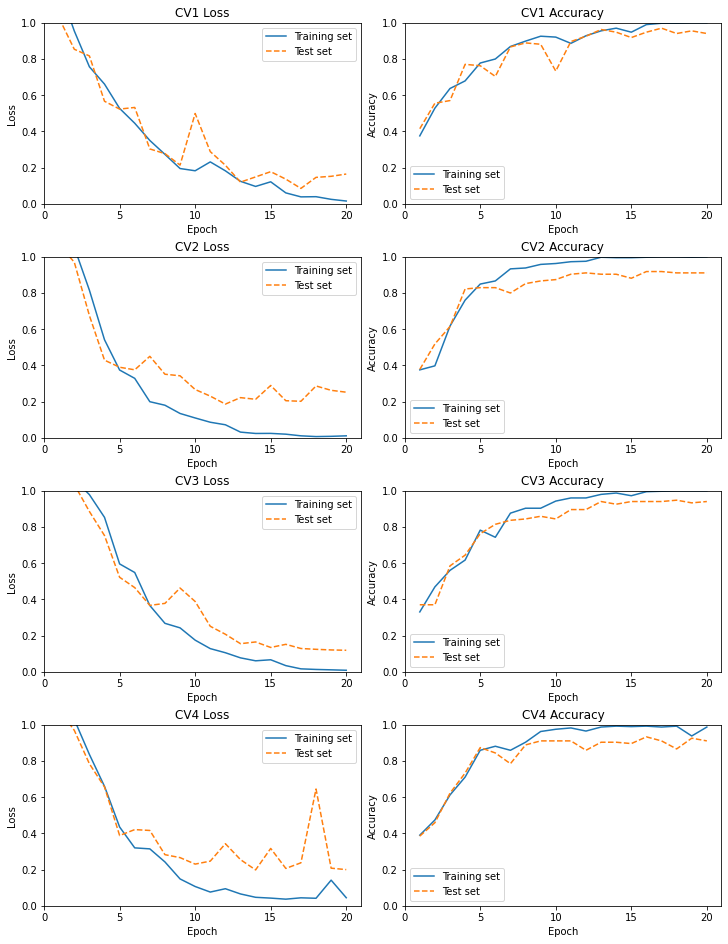

In [20]:
n_epochs = 20
#set the x axis from 1
x_axis = np.arange(1, 21)

fig, ax = plt.subplots(4, 2, constrained_layout=True, figsize=(10,13))

for i in range(4):
  for j in range(2):
    if(j == 0):
      ax[i,j].set_title('CV' + str(i+1) + ' Loss')
      ax[i,j].set_ylabel('Loss')
      ax[i,j].plot(x_axis, LOSS[i], label='Training set')
      ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
    else:
      ax[i,j].set_title('CV' + str(i+1) + ' Accuracy')
      ax[i,j].set_xlabel('Epoch')
      ax[i,j].set_ylabel('Accuracy')
      ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
      ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')
    ax[i,j].set_xlabel('Epoch')
    ax[i,j].set_ylim((0, 1))
    ax[i,j].set_xticks(np.arange(0, 21, 5))
    ax[i,j].legend()



---



---



4.2 Testing on New Data



*   Percobaan 1 (Banjar Segar)



In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_segar.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_baik.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/TugasAkhir/test_newdata/banjar_tidaklayak.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Untuk menampilkan hasil dalam bentuk desimal
np.set_printoptions(suppress=True) 

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

# Convert to TensorFlow Lite

5.1 Save model

In [21]:
from tensorflow.keras.models import load_model

In [22]:
model.save(os.path.join('models', 'model-20epoch_4-foldcv.h5'))

5.2 Convert to tflite

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

5.3 Save .tflite model

In [24]:
with open("model-20epoch_4-foldcv.tflite", "wb") as f:
  f.write(tflite_model)

In [25]:
tflite_model_path = "model-20epoch_4-foldcv.tflite"



---



---

